# Phase 1 – Data Cleaning & Feature Engineering
**Challenge:** DataVerse Africa – AfriMarket Seller Risk  
**Name:** Erhahi Deborah  
**Date:** July 2025

In [1]:
pip install pandas numpy matplotlib seaborn plotly scikit-learn imbalanced-learn streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv('../data/jumia_jitters_dataset.csv')
df.head(2)

,Order ID,Order Date,Dispatch Date,Delivery Date,Seller ID,Product Category,Price,Quantity,Warehouse Zone,Customer Rating,Review Text,Sentiment Score,Return Flag,Complaint Code,Delivery Method,Customer Region
0,O00000,5/28/2025,5/30/2025,06/06/2025,S033,Fashion,193.52,1.0,Kano,4.0,Packaging could be better but the item works f...,0.458333,No,No Complaint,Express,North Central
1,O00001,6/24/2025,6/26/2025,07/03/2025,S018,Groceries,86.45,3.0,Lagos,3.0,Packaging could be better but the item works f...,0.458333,No,No Complaint,Standard,Volta


#### INITIAL DATA EXPLORATION 

In [27]:
# Overview of structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1000 non-null   object 
 1   Order Date        993 non-null    object 
 2   Dispatch Date     996 non-null    object 
 3   Delivery Date     998 non-null    object 
 4   Seller ID         1000 non-null   object 
 5   Product Category  989 non-null    object 
 6   Price             974 non-null    float64
 7   Quantity          991 non-null    float64
 8   Warehouse Zone    981 non-null    object 
 9   Customer Rating   997 non-null    float64
 10  Review Text       967 non-null    object 
 11  Sentiment Score   994 non-null    float64
 12  Return Flag       1000 non-null   object 
 13  Complaint Code    988 non-null    object 
 14  Delivery Method   1000 non-null   object 
 15  Customer Region   1000 non-null   object 
dtypes: float64(4), object(12)
memory usage: 125

In [28]:
# Summary statistics
df.describe()

,Price,Quantity,Customer Rating,Sentiment Score
count,974.000000,991.000000,997.000000,994.000000
mean,256.466735,2.524723,3.442327,0.090091
std,137.696415,1.138466,1.214840,0.582074
min,10.070000,1.000000,1.000000,-0.975000
25%,136.650000,1.000000,3.000000,-0.300000
50%,266.860000,3.000000,4.000000,0.000000
75%,369.022500,4.000000,4.000000,0.500000
max,498.900000,4.000000,5.000000,1.000000


In [29]:
# Missing values count
df.isnull().sum()

Order ID             0
Order Date           7
Dispatch Date        4
Delivery Date        2
Seller ID            0
Product Category    11
Price               26
Quantity             9
Warehouse Zone      19
Customer Rating      3
Review Text         33
Sentiment Score      6
Return Flag          0
Complaint Code      12
Delivery Method      0
Customer Region      0
dtype: int64

In [30]:
df.columns

Index(['Order ID', 'Order Date', 'Dispatch Date', 'Delivery Date', 'Seller ID',
       'Product Category', 'Price', 'Quantity', 'Warehouse Zone',
       'Customer Rating', 'Review Text', 'Sentiment Score', 'Return Flag',
       'Complaint Code', 'Delivery Method', 'Customer Region'],
      dtype='object')

### CLEAN AND STANDARDIZE FIELDS 

In [31]:
# Normalize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns # Confirm cleaned names

Index(['order_id', 'order_date', 'dispatch_date', 'delivery_date', 'seller_id',
       'product_category', 'price', 'quantity', 'warehouse_zone',
       'customer_rating', 'review_text', 'sentiment_score', 'return_flag',
       'complaint_code', 'delivery_method', 'customer_region'],
      dtype='object')

In [32]:
#convert date column
df['order_date'] = pd.to_datetime(df['order_date'])
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [33]:
#FIX MISSING VALUES 

# Drop rows with critical missing dates
df = df.dropna(subset=['order_date', 'dispatch_date', 'delivery_date'])

# Fill categorical or text columns
df['product_category'] = df['product_category'].fillna("Unknown")
df['warehouse_zone'] = df['warehouse_zone'].fillna("Not Assigned")
df['complaint_code'] = df['complaint_code'].fillna("None")
df['review_text'] = df['review_text'].fillna("No review")

# Fill numeric fields using median to handle outliers
df['price'] = df['price'].fillna(df['price'].median())
df['quantity'] = df['quantity'].fillna(df['quantity'].median())
df['customer_rating'] = df['customer_rating'].fillna(df['customer_rating'].median())
df['sentiment_score'] = df['sentiment_score'].fillna(df['sentiment_score'].median())


In [34]:
#Clean Categorical Text Fields
df['product_category'] = df['product_category'].str.title().str.strip()
df['warehouse_zone'] = df['warehouse_zone'].str.title().str.strip()
df['complaint_code'] = df['complaint_code'].str.upper().str.strip()
df['delivery_method'] = df['delivery_method'].str.title().str.strip()
df['customer_region'] = df['customer_region'].str.title().str.strip()

In [35]:
#Convert Target Column (return_flag) to Numeric
df['return_flag'].unique()
df['return_flag'] = df['return_flag'].map({'Yes': 1, 'No': 0})

In [36]:
#check
df.head(2)

,order_id,order_date,dispatch_date,delivery_date,seller_id,product_category,price,quantity,warehouse_zone,customer_rating,review_text,sentiment_score,return_flag,complaint_code,delivery_method,customer_region
0,O00000,2025-05-28,2025-05-30,2025-06-06,S033,Fashion,193.52,1.0,Kano,4.0,Packaging could be better but the item works f...,0.458333,0,NO COMPLAINT,Express,North Central
1,O00001,2025-06-24,2025-06-26,2025-07-03,S018,Groceries,86.45,3.0,Lagos,3.0,Packaging could be better but the item works f...,0.458333,0,NO COMPLAINT,Standard,Volta


### FEATURE ENGINEERING

In [37]:
# Delivery delay (in days)
df['delivery_delay'] = (df['delivery_date'] - df['dispatch_date']).dt.days
df['is_late'] = df['delivery_delay'].apply(lambda x: 1 if x > 0 else 0)

# Order Value
df['order_value'] = df['price'] * df['quantity']

# Complaint flag
df['has_complaint'] = df['complaint_code'].apply(lambda x: 0 if x == "None" else 1)

# Low Rating flag
df['low_rating'] = df['customer_rating'].apply(lambda x: 1 if x < 3 else 0)

In [38]:
# Review Length 
df['review_length'] = df['review_text'].apply(len)

In [39]:
#sentiment label 
def sentiment_bucket(score):
    if score >= 0.4:
        return 'Positive'
    elif score <= -0.4:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(sentiment_bucket)

### SELLER- LEVEL RISK MATRICS 

In [40]:
# Return rate per seller
seller_return_rate = df.groupby('seller_id')['return_flag'].mean().reset_index()
seller_return_rate.columns = ['seller_id', 'seller_return_rate']

In [41]:
# Complaint rate per seller
seller_complaint_rate = df.groupby('seller_id')['has_complaint'].mean().reset_index()
seller_complaint_rate.columns = ['seller_id', 'seller_complaint_rate']

In [42]:
# Merge both back into main dataframe
df = df.merge(seller_return_rate, on='seller_id', how='left')
df = df.merge(seller_complaint_rate, on='seller_id', how='left')

df[['seller_id', 'seller_return_rate', 'seller_complaint_rate']].head()

top_risky = df.groupby('seller_id')[['seller_return_rate', 'seller_complaint_rate']].mean()
top_risky.sort_values(by='seller_return_rate', ascending=False).head(10).reset_index()

,seller_id,seller_return_rate,seller_complaint_rate
0,S039,0.133333,1.0
1,S040,0.125000,1.0
2,S036,0.125000,1.0
3,S025,0.100000,1.0
4,S004,0.083333,1.0
5,S021,0.071429,1.0
6,S046,0.058824,1.0
7,S022,0.055556,1.0
8,S024,0.055556,1.0
9,S013,0.052632,1.0


In [43]:
# Composite Seller Risk Score
df['seller_risk_score'] = (
    0.5 * df['seller_return_rate'] + 
    0.5 * df['seller_complaint_rate']
)

In [44]:
# Seller-Level Summary
seller_summary = df.groupby('seller_id').agg({
    'order_id': 'count',
    'delivery_delay': 'mean',
    'is_late': 'mean',
    'has_complaint': 'mean',
    'low_rating': 'mean',
    'return_flag': 'mean',
    'customer_rating': 'mean',
    'order_value': 'sum',
    'price': 'mean',
    'seller_return_rate': 'mean',
    'seller_complaint_rate': 'mean',
    'seller_risk_score': 'mean'
}).rename(columns={
    'order_id': 'total_orders',
    'delivery_delay': 'avg_delay',
    'is_late': 'late_delivery_rate',
    'has_complaint': 'complaint_rate',
    'low_rating': 'low_rating_rate',
    'return_flag': 'return_rate',
    'customer_rating': 'avg_rating',
    'order_value': 'total_revenue',
    'price': 'avg_price'
}).reset_index()

In [45]:
seller_summary['seller_risk_score'] = (
    0.5 * seller_summary['return_rate'] + 
    0.5 * seller_summary['complaint_rate']
)

#### VISUALIZE INSIGHTS - TOP 10 RISKY SELLERS 

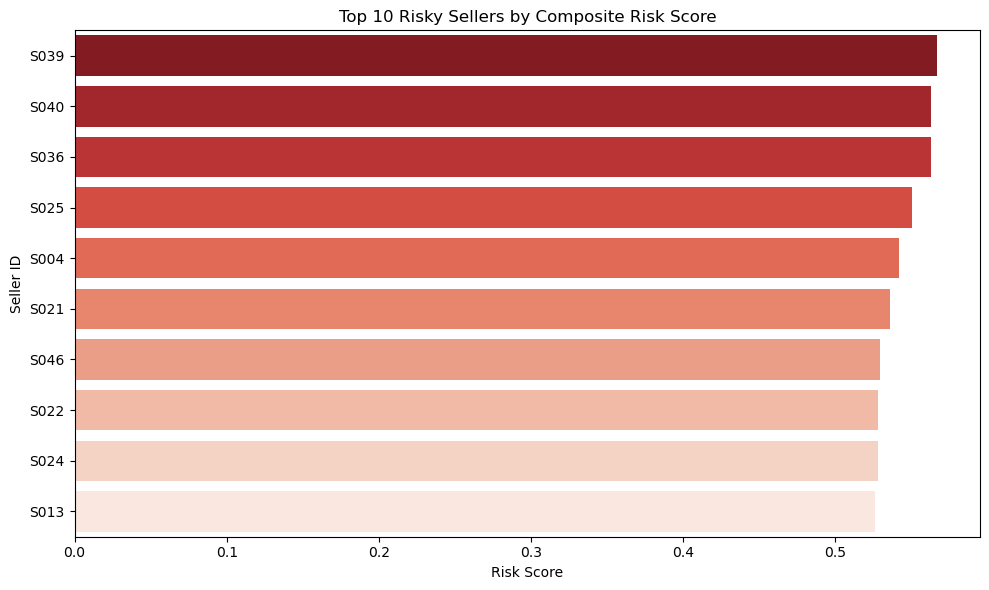

In [46]:
top_risky_sellers = seller_summary.sort_values(by='seller_risk_score', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_risky_sellers,
    x='seller_risk_score',
    y='seller_id',
    palette='Reds_r'
)
plt.title("Top 10 Risky Sellers by Composite Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Seller ID")
plt.tight_layout()

plt.savefig('../visuals/charts/seller_risk_chart.png')  # Save chart as PNG
plt.show()

In [47]:
#Save Cleaned Files
df.to_csv("../cleaned/cleaned_orders.csv", index=False)
seller_summary.to_csv("../cleaned/seller_summary.csv", index=False)

___
## Phase 1 Summary: Data Cleaning & Feature Engineering

I carried out the following tasks to prepare the dataset for analysis and modeling:
...
___
#### Data Cleaning
- Dropped rows with missing critical dates (`order_date`, `dispatch_date`, `delivery_date`)
- Filled missing values in categorical and numeric fields using appropriate strategies
- **Cleaned and standardized** fields like product categories, warehouse zones, and complaint codes
- Normalized column names (lowercase, underscore format)
...
___
#### Feature Engineering
- Created new features to capture:
  - `delivery_delay`: Delivery lag in days
  - `is_late`: Binary flag for late deliveries
  - `order_value`: Price × Quantity
  - `has_complaint`: Binary flag from `complaint_code`
  - `low_rating`: Flag for customer ratings below 3
  - `review_length`: Character count of review text
  - `sentiment_label`: Categorized sentiment based on `sentiment_score`
...
___
#### Seller-Level Risk Metrics
- Calculated:
  - Seller-level **return rate**
  - Seller-level **complaint rate**
  - Composite **risk score** based on both metrics
- Created `seller_summary` dataset for modeling, risk profiling, and visual analysis

> This cleaned and enriched dataset forms the foundation for deeper analytics and predictive modeling in the next phases.
...